In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [7]:
data_path = "C:/Users/Modern/Мой диск/Диссертация/Data/Faraday balance/membr BSA FeC 1 all.dat"

In [8]:
data_pd = pd.read_csv(data_path, sep = "\t")
labels = data_pd.columns
print(labels)

Index(['H', 'M', 'T', 'Mc', 'emu', 'Time', 'RTime'], dtype='object')


In [9]:
high_field_part = data_pd[data_pd["H"] > 4]
# print(high_field_part)


In [78]:
slope, intercept, r_value, p_value, std_err = stats.linregress(high_field_part['H'],high_field_part['emu'])

x_0 = 0
y_0 = slope*x_0 + intercept

x_last = high_field_part['H'].tail(1).values[0]
y_last = slope*x_last + intercept


x = [x_0,x_last]
y = [y_0,y_last]


intercept_rounded = round(intercept,3)
print(intercept_rounded)

0.022


(0.0, 0.025)

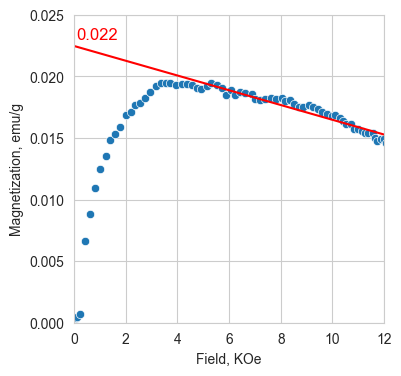

In [82]:
plt.subplots(figsize=(4, 4))
sns.set_style("whitegrid")
ax = sns.scatterplot(data = data_pd, x = 'H', y = "emu")
# sns.regplot(data = high_field_part, x = 'H', y = "emu", scatter=False)
sns.lineplot(x=x,y=y, color="red")
ax.set(xlabel='Field, KOe', ylabel='Magnetization, emu/g')
ax.text(x=0.1, y=0.023, s=str(intercept_rounded), fontsize=12, color = "red")
ax.set_xlim(0, 12)
ax.set_ylim(0, 0.025)
# ax.set_aspect('equal')
# plt.show()